<center><h1>Analyzing Automobile Fuel Economy Data</h1><h3>Using Python</h3></center>

Data source: [http://www.fueleconomy.gov/feg/ws/index.shtml](http://www.fueleconomy.gov/feg/ws/index.shtml)<br>
Data file: [http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip](http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip)<br>
Data meta data: [http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle)

#### I've installed the usual packages for data analyis and plotting:

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [4]:
# I've downloaded the csv file, so let's see what's in it
vehicles = pd.read_csv('/home/pybokeh/temp/vehicles.csv')

In [6]:
pivot_ui(vehicles)

In [7]:
pivot_ui(vehicles)

In [8]:
pivot_ui(vehicles)

### If you rather observe the columns vertically, we can transpose the dataframe:

In [4]:
vehicles.head(1).transpose()

,0
barrels08,15.6894
barrelsA08,0
charge120,0
charge240,0
city08,19
city08U,0
cityA08,0
cityA08U,0
cityCD,0
cityE,0


#### Let's say you are wondering how the overall combined fuel economy (highway + city) has improved with each successive model year of gasoline-based automobiles, how would you find out?

Looking at the data [metadata](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle), looks like I need to filter based off of "fuelType", "fuelType1", "fuelType2", and "atvType".

**Looks like we can't filter using "fuelType" since there are categories like "Gasoline and natural gas" which we don't want if we're just looking for gas only vehicles.**

In [5]:
vehicles.fuelType.value_counts()

Regular                        24616
Premium                         9524
Gasoline or E85                 1164
Diesel                          1090
Premium or E85                   116
Electricity                       95
Midgrade                          61
CNG                               60
Gasoline or natural gas           20
Regular Gas and Electricity       14
Premium Gas or Electricity        14
Premium and Electricity            9
Gasoline or propane                8
Regular Gas or Electricity         1
Name: fuelType, dtype: int64

**Looks like we can use "fuelType1" as the primary column to filter with**

In [6]:
vehicles.fuelType1.value_counts()

Regular Gasoline     25823
Premium Gasoline      9663
Diesel                1090
Electricity             95
Midgrade Gasoline       61
Natural Gas             60
Name: fuelType1, dtype: int64

In [7]:
vehicles.fuelType2.value_counts()

E85            1280
Electricity      38
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64

In [8]:
vehicles.atvType.value_counts()

FFV               1280
Diesel            1018
Hybrid             424
EV                  95
CNG                 50
Plug-in Hybrid      38
Bifuel (CNG)        20
Bifuel (LPG)         8
Name: atvType, dtype: int64

### Our first attempt to filter our data to just gasoline powered vehicles

In [9]:
# Ensure automobile only takes gasoline as fuel
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])

# Ensure it doesn't have a secondary fuel source
criteria2 = vehicles.fuelType2.isnull()

# I noticed after applying criteria 1 and 2, there were hybrids in my list under the atvType column
# So I want to ensure hybrids are excluded as well
criteria3 = vehicles.atvType != 'Hybrid'

In [10]:
# Apply the criteria
gas_vehicle_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]

In [16]:
gas_vehicle_non_hybrid[['fuelType1','fuelType2']].head(100)

,fuelType1,fuelType2
0,Regular Gasoline,NaN
1,Regular Gasoline,NaN
2,Regular Gasoline,NaN
3,Regular Gasoline,NaN
4,Premium Gasoline,NaN
5,Regular Gasoline,NaN
6,Regular Gasoline,NaN
7,Regular Gasoline,NaN
8,Regular Gasoline,NaN
9,Regular Gasoline,NaN


In [79]:
# Group the data by model year
grouped = gas_vehicle_non_hybrid.groupby(['year'])

In [80]:
# Get the average mpg for each model year
average = grouped['comb08'].agg(np.mean)

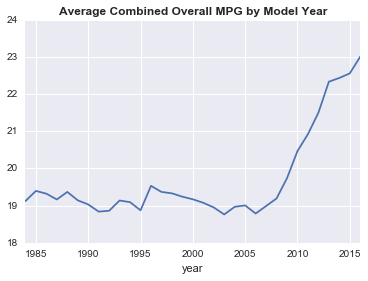

In [81]:
# Let's plot the average mpg with each model year
average.plot()
plt.title("Average Combined Overall MPG by Model Year", weight='bold')
plt.show()

**If you're wondering why the decline in fuel economy beginning around mid-90s, more weight was subsequently added to the vehicles as more safety features were added (additional airbags, reinforced metals in frames and doors).  Also, during this time, is the introduction of more SUVs.  Sadly, data set does not include vehicle weight.**

## Let's compare combined (city + hwy) average overall mpg of gasonline-based Honda/Acura vs Toyota/Lexus

In [82]:
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != 'Hybrid'
criteria4 = vehicles.make.isin(['Honda','Acura','Toyota','Lexus'])

honda_toyota_vehicle_non_hybrid = vehicles[criteria1 & criteria2 & criteria3 & criteria4]

In [83]:
# Since I need to plot honda and toyota data on same plot, I had to resort to creating a dataframe
# using pandas pivot_table method instead of the groupby / agg() method that I did above
honda_toyota_average = honda_toyota_vehicle_non_hybrid.pivot_table('comb08', index='year',
    columns='make', aggfunc='mean')

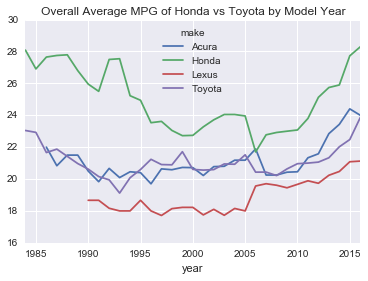

In [84]:
honda_toyota_average.plot()
plt.title("Overall Average MPG of Honda vs Toyota by Model Year")
plt.show()

**Wow didn't know Toyota lagged this much in fuel economy behind Honda for gas-based vehicles in recent years.  Maybe they focused on hybrid/electric motor efficiency?<br><br>
Chart above is somewhat misleading because I know for a fact Toyota has a larger fleet of larger vehicles and pickup trucks compared to Honda, which probably skewed their MPG to lower values.**

### So to make things fair, let's limit our Honda/Toyota data to just smaller vehicles:

- Compact Cars
- Subcompact Cars
- Midsize Cars
- Large Cars

Looking at the [metadata](http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle) again, we can filter by vehicle class using the VClass column.

In [85]:
vehicles.VClass.value_counts()

Compact Cars                          5341
Subcompact Cars                       4733
Midsize Cars                          4193
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2090
Two Seaters                           1810
Large Cars                            1759
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1467
Special Purpose Vehicles              1455
Minicompact Cars                      1194
Standard Pickup Trucks 2WD            1153
Vans                                  1141
Standard Pickup Trucks 4WD             954
Midsize-Large Station Wagons           643
Special Purpose Vehicle 2WD            590
Small Pickup Trucks                    538
Midsize Station Wagons                 526
Vans, Cargo Type                       438
Small Pickup Trucks 2WD                418
Small Sport Utility Vehicle 4WD        399
Standard Sport Utility Vehicle 4WD     330
Minivan - 2WD                          330
Small Sport

In [86]:
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != 'Hybrid'
criteria4 = vehicles.make.isin(['Honda','Acura','Toyota','Lexus'])
criteria5 = vehicles.VClass.isin(['Compact Cars','Subcompact Cars','Midsize Cars', 'Large Cars',
                                  'Sport Utility Vehicel','Minivan'])

honda_toyota_vehicle_non_hybrid = vehicles[criteria1 & criteria2 & criteria3 & criteria4
                                           & criteria5]

honda_toyota_average = honda_toyota_vehicle_non_hybrid.pivot_table('comb08', index='year',
    columns='make', aggfunc='mean')

### Before we plot the data, let's make sure we got the data we expect

In [87]:
# You never know, there could be leading or trailing whitespace(s) which cause us 
# to miss the data
honda_toyota_vehicle_non_hybrid.VClass.value_counts()

Subcompact Cars    604
Compact Cars       414
Midsize Cars       340
Large Cars          38
Name: VClass, dtype: int64

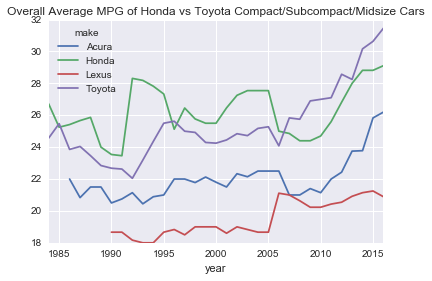

In [88]:
honda_toyota_average.plot()
plt.title("Overall Average MPG of Honda vs Toyota Compact/Subcompact/Midsize Cars")
plt.show()

### Wow, look at how things are different.  In recent years, Toyota has had a slight edge over Honda.  But Lexus' MPG has been pretty stagnant.